# Datos descargados de: https://www.pmel.noaa.gov/tao/drupal/disdel/



---


# AUTOR : Michael De La Cruz La Rosa
### 20180176@lamolina.edu.pe
### Michael.dlc.lr@gmail.com
# PERFIL VERTICAL DE "ANOMALÍA DE TEMPERATURA SUB SUPERFICIAL DEL MAR" DE LA BOYA UBICADA EN 0N - 170W

---



In [163]:
# Conectando google drive con colab:
#-------------------------------------
from google.colab import drive
drive.mount('/content/drive/')
#-------------------------------------
import os
path = '/content/drive/MyDrive/Colab Notebooks/OCEANOGRAFIA/OCEANOGRAFIA/' # Ruta del directorio de trabajo
os.chdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [164]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [165]:
ds = xr.open_dataset(path + 't0n170w_dy.cdf',
                       drop_variables = ['time_bnds','ST_6020','QT_5020','ZSST_2003','depzsst']) # Eliminamos variable inservibles.
ds['time'] = pd.date_range(ds.time[0].values, ds.time[-1].values, freq = 'D')
# =============================================================================
# En este caso vamos a eliminar lat y lon ya que no lo utilizaremos:
ds = ds.sel(lat=ds.lat, lon=ds.lon, method='nearest').squeeze(drop=True)
ds

<xarray.Dataset>
Dimensions:  (time: 13030, depth: 20)
Coordinates:
  * time     (time) datetime64[ns] 1988-05-16T12:00:00 ... 2024-01-17T12:00:00
  * depth    (depth) float32 1.0 5.0 9.0 10.0 13.0 ... 200.0 250.0 300.0 500.0
Data variables:
    T_20     (time, depth) float32 ...
Attributes:
    platform_code:                0n170w
    site_code:                    0n170w
    wmo_platform_code:            51010
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                06:19 19-JAN-2024

In [166]:
# Contar la cantidad de valores en cada profundidad
prof_count = ds['T_20'].count(dim='time')
prof_count

<xarray.DataArray 'T_20' (depth: 20)>
array([10468,  5461,   120,  7734,  1421, 11478,   120, 11222,  2039,
       10862, 10635,  2039, 11617, 11533,  2039,   108, 11617, 11540,
       11553, 11385])
Coordinates:
  * depth    (depth) float32 1.0 5.0 9.0 10.0 13.0 ... 200.0 250.0 300.0 500.0

In [167]:
# Vamos a eliminar las profundidades que tengan mayores datos vacíos
# Superior al (50% del máximo de datos)
# =============================================================================
# Calcular el 50% del máximo número de valores
umbral = 0.5 * prof_count.max()

# Filtrar las profundidades basadas en la condición
prof_validas = prof_count.where(prof_count >= umbral, drop=True)
prof_validas

<xarray.DataArray 'T_20' (depth: 12)>
array([10468.,  7734., 11478., 11222., 10862., 10635., 11617., 11533.,
       11617., 11540., 11553., 11385.])
Coordinates:
  * depth    (depth) float32 1.0 10.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0

In [168]:
# ASIGNAMOS NUEVAMENTE A LA VARIABLE INICIAL
ds_ga = ds['T_20'].where(prof_count >= umbral, drop=True)
ds_ga # Observamos que existen valores nan, necesitamos realizar
# una o más de una interpolación

<xarray.DataArray 'T_20' (time: 13030, depth: 12)>
array([[27.46    ,       nan,       nan, ..., 12.4     , 11.29    ,
         8.34    ],
       [27.36    ,       nan,       nan, ..., 12.86    , 11.79    ,
         8.41    ],
       [27.34    ,       nan,       nan, ..., 13.12    , 11.69    ,
         8.33    ],
       ...,
       [29.140364, 29.135174, 29.111311, ..., 12.346255, 12.024926,
         8.951339],
       [29.218422, 29.16115 , 29.12154 , ..., 12.354647, 12.093337,
         8.907393],
       [29.17339 , 29.123938, 29.085659, ..., 12.427791, 12.037096,
         8.719049]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1988-05-16T12:00:00 ... 2024-01-17T12:00:00
  * depth    (depth) float32 1.0 10.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0
Attributes:
    name:            T
    long_name:       TEMPERATURE (C)
    generic_name:    temp
    FORTRAN_format:  f10.2
    units:           C
    epic_code:       20

# Interpolación

In [169]:
# Interpolación Lineal
ds_ga = ds_ga.interpolate_na(dim='time', method = 'linear')
ds_ga

<xarray.DataArray 'T_20' (time: 13030, depth: 12)>
array([[27.46    ,       nan,       nan, ..., 12.4     , 11.29    ,
         8.34    ],
       [27.36    ,       nan,       nan, ..., 12.86    , 11.79    ,
         8.41    ],
       [27.34    ,       nan,       nan, ..., 13.12    , 11.69    ,
         8.33    ],
       ...,
       [29.140364, 29.135174, 29.111311, ..., 12.346255, 12.024926,
         8.951339],
       [29.218422, 29.16115 , 29.12154 , ..., 12.354647, 12.093337,
         8.907393],
       [29.17339 , 29.123938, 29.085659, ..., 12.427791, 12.037096,
         8.719049]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1988-05-16T12:00:00 ... 2024-01-17T12:00:00
  * depth    (depth) float32 1.0 10.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0
Attributes:
    name:            T
    long_name:       TEMPERATURE (C)
    generic_name:    temp
    FORTRAN_format:  f10.2
    units:           C
    epic_code:       20

In [170]:
# Interpolación Cúbica
ds_ga_interp = ds_ga.interpolate_na(dim='depth', method = 'cubic',fill_value="extrapolate")
ds_ga_interp

<xarray.DataArray 'T_20' (time: 13030, depth: 12)>
array([[27.46    , 27.325958, 27.234158, ..., 12.4     , 11.29    ,
         8.34    ],
       [27.36    , 27.159323, 27.031246, ..., 12.86    , 11.79    ,
         8.41    ],
       [27.34    , 26.764397, 26.506285, ..., 13.12    , 11.69    ,
         8.33    ],
       ...,
       [29.140364, 29.135174, 29.111311, ..., 12.346255, 12.024926,
         8.951339],
       [29.218422, 29.16115 , 29.12154 , ..., 12.354647, 12.093337,
         8.907393],
       [29.17339 , 29.123938, 29.085659, ..., 12.427791, 12.037096,
         8.719049]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1988-05-16T12:00:00 ... 2024-01-17T12:00:00
  * depth    (depth) float32 1.0 10.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0
Attributes:
    name:            T
    long_name:       TEMPERATURE (C)
    generic_name:    temp
    FORTRAN_format:  f10.2
    units:           C
    epic_code:       20

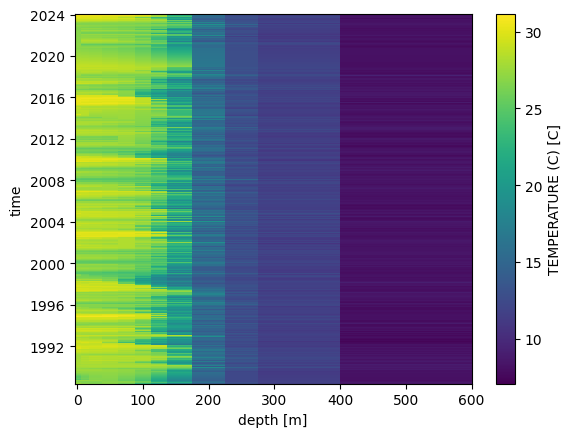

In [171]:
# Observación rápida
ds_ga_interp.plot() # Hay datos faltantes (vacíos)


---


 # PROMEDIO HISTÒRICO DIARIO (CLIM: 1991-01-01 - 2020-12-31)

---

In [172]:
# Calcular el promedio climatológico de cada día del año
Inicio = '1991-01-01'
Fin = '2020-12-31'
clim = ds_ga_interp.sel(time=slice(Inicio, Fin)).groupby('time.dayofyear').mean(dim='time')
clim

<xarray.DataArray 'T_20' (dayofyear: 366, depth: 12)>
array([[27.693233, 27.674086, 27.674625, ..., 12.883016, 11.730791,
         8.291036],
       [27.680317, 27.661993, 27.66785 , ..., 12.954919, 11.732901,
         8.27172 ],
       [27.71562 , 27.690092, 27.689838, ..., 12.967249, 11.739288,
         8.32311 ],
       ...,
       [27.697563, 27.628962, 27.605358, ..., 12.957196, 11.734475,
         8.241551],
       [27.691881, 27.618134, 27.600628, ..., 12.917304, 11.718018,
         8.283825],
       [27.401897, 27.28927 , 27.255161, ..., 12.984313, 11.69828 ,
         8.315618]], dtype=float32)
Coordinates:
  * depth      (depth) float32 1.0 10.0 25.0 50.0 ... 200.0 250.0 300.0 500.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Attributes:
    name:            T
    long_name:       TEMPERATURE (C)
    generic_name:    temp
    FORTRAN_format:  f10.2
    units:           C
    epic_code:       20

---


 # CÁLCULO DE LA ANOMALÍA APARTIR DEL PROMEDIO HISTÓRICO DIARIO

---

In [173]:
# Calcular la anomalía diaria en relación al promedio climatológico de cada día del año
anom = ds_ga_interp.groupby('time.dayofyear') - clim
anom = anom.T
anom

<xarray.DataArray 'T_20' (depth: 12, time: 13030)>
array([[-0.81222916, -0.88225555, -0.95983696, ...,  1.5082703 ,
         1.5757523 ,  1.5228844 ],
       [-0.82351875, -0.96554375, -1.4016666 , ...,  1.5723896 ,
         1.5924187 ,  1.549511  ],
       [-0.77433395, -0.99292564, -1.5464115 , ...,  1.5666924 ,
         1.5760136 ,  1.5275326 ],
       ...,
       [-0.20509052,  0.24871159,  0.50685596, ..., -0.5747547 ,
        -0.69005966, -0.6059017 ],
       [-0.16508389,  0.3599987 ,  0.21151447, ...,  0.3575821 ,
         0.3445797 ,  0.22930813],
       [ 0.2719488 ,  0.3301773 ,  0.24348736, ...,  0.6880846 ,
         0.6357498 ,  0.43591976]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1988-05-16T12:00:00 ... 2024-01-17T12:00:00
  * depth      (depth) float32 1.0 10.0 25.0 50.0 ... 200.0 250.0 300.0 500.0
    dayofyear  (time) int64 137 138 139 140 141 142 143 ... 11 12 13 14 15 16 17

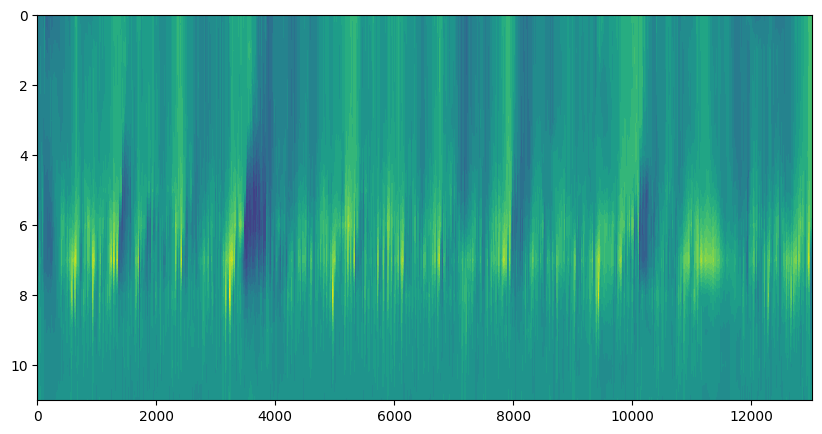

In [174]:
# Visualización rápida
fig , ax = plt.subplots(figsize=(10,5))
ax.contourf(anom,29);
# Invertimos el eje y
ax.invert_yaxis()

In [175]:
# %%capture
# !pip install cmocean
import cmocean
import cmocean.cm as cmo

In [181]:
from scipy.ndimage import gaussian_filter
import datetime
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

def Anom(data,sigma):
  fig, ax = plt.subplots(figsize=(20, 3))
  # Obtener los datos y fechas de tu gráfica
  dates = data.time
  values = data.values
  # -----------------------------------------------------------------------------------------
  # Suavizado de contornos y countor fill
  sigma = sigma
  interp_temp_smooth = gaussian_filter(data, sigma=sigma)
  # -----------------------------------------------------------------------------------------
  # Graficar mapa de colores suavizado
  levels = np.arange(-9, 9, 1)
  colors = cmocean.tools.lighten(cmo.balance, 1)
  # Definir los colores de la paleta
  colors = mcolors.LinearSegmentedColormap.from_list('paleta',
                                                     ['#053061','#053061', '#2166AC', '#4393C3', '#92C5DE', '#D1E5F0', # Azules
                                                      '#FFFFFF', '#FFFFFF', # Blancos
                                                      '#FDDBC7', '#F4A582', '#D6604D', '#B2182B', '#67001F']) # Rojos
  # cs = ax.contourf(data.time, data.depth, interp_temp_smooth, levels, cmap="RdBu_r")
  cs = ax.contourf(data.time, data.depth, interp_temp_smooth, levels, cmap=colors)

  # # Definir niveles de las líneas de contorno
  black_levels = [-9,-8,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5]
  grey_levels = [level for level in levels if level not in black_levels]

  # Líneas de contorno con suavizado
  cs2 = ax.contour(data.time, data.depth, interp_temp_smooth, colors='black', levels=black_levels, linewidths=0.9, linestyles='-')
  cs3 = ax.contour(data.time, data.depth, interp_temp_smooth, colors='white', levels=grey_levels, linewidths=0.5, linestyles='-')

  # Agregar etiquetas a las líneas de contorno
  ax.clabel(cs2, fmt='%2.1f', colors='black', fontsize=12)
  # -----------------------------------------------------------------------------------------
    # Invertir el eje y y establecer límites y escala del eje y
  ax.invert_yaxis()
  ax.set_ylim(500, 0)
  ax.set_yticks(range(0, 501, 50)) # Hasta 300m de profundidad
  # -----------------------------------------------------------------------------------------
  # Agregar etiquetas de valores en la barra de colores
  cbar = fig.colorbar(cs, ax=ax, ticks=np.arange(-9, 9))
  cbar.outline.set_linewidth(1)
  cbar.ax.tick_params(labelsize=8)
  # cbar.ax.set_yticklabels(['{:.0f}'.format(i) for i in np.arange(-7, 8)])
  cbar.ax.set_position([0.755, 0.1, 5, 0.8])  # [left, bottom, width, height]
  # -----------------------------------------------------------------------------------------
  ax.set_title(f"Anomalías de Temperatura [°C] Sub Superficial del mar\
   \nAños: {year} - {next_year}, Boya: {ds.attrs['site_code']}",fontsize=12, color = 'black')

  ax.xaxis.label.set_color('black')
  ax.yaxis.label.set_color('black')
  ax.tick_params(colors='black')

  plt.xticks(fontsize = 10)
  plt.yticks(fontsize = 10)
  ax.set_xlabel('')

  ax.xaxis.set_major_locator(mdates.MonthLocator())
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
  plt.xticks()
  plt.xticks(rotation=10)

  ax.set_ylabel('Depth [m]', fontsize=10)

  plt.text(0, -0.20, 'Fuente de datos: NOAA [TAO/TRITON]',fontsize=10, ha='left',
        va='center', color='black', transform=plt.gca().transAxes)
  #-----------------------------------------------------------------------------------------
  # fig.savefig(path + f'AnomTempSub{year} - {next_year}.pdf',
  #                 transparent = False, pad_inches = 0.1, dpi = 700, bbox_inches = 'tight')
  plt.show()
  plt.close()

# Ajustando el suaizado (0)

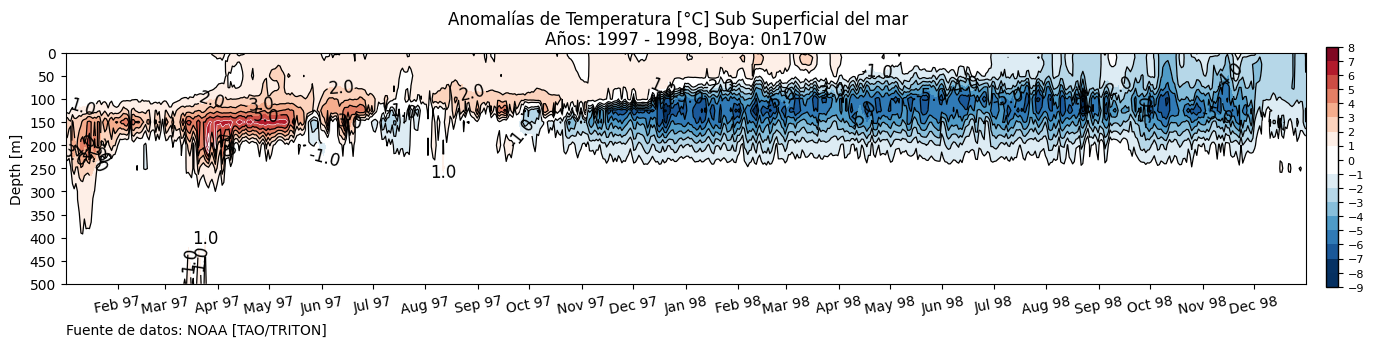

In [182]:
years = [1997,1998]
for i in range(len(years)-1):
  year = years[i]
  next_year = years[i+1]
  years_unidosxd = anom.sel(time=slice(f'{year}-01-01', f'{next_year}-12-31'))
  Anom(years_unidosxd,0) # Ajustar el suavizado (valores mayores a 0)

# Suavizado 0.85

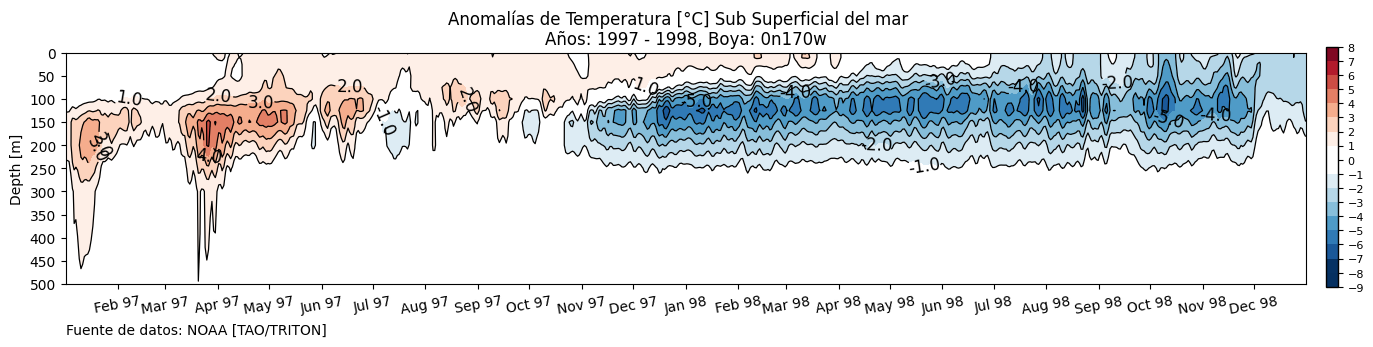

In [183]:
years = [1997,1998]
for i in range(len(years)-1):
  year = years[i]
  next_year = years[i+1]
  years_unidosxd = anom.sel(time=slice(f'{year}-01-01', f'{next_year}-12-31'))
  Anom(years_unidosxd,0.85) # Ajustar el suavizado (valores mayores a 0)

# Suavizado 1

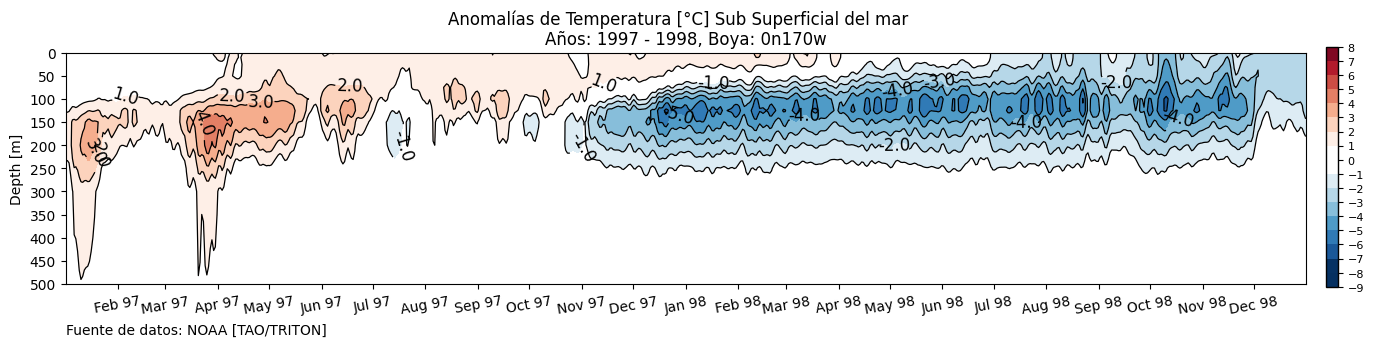

In [184]:
years = [1997,1998]
for i in range(len(years)-1):
  year = years[i]
  next_year = years[i+1]
  years_unidosxd = anom.sel(time=slice(f'{year}-01-01', f'{next_year}-12-31'))
  Anom(years_unidosxd,1) # Ajustar el suavizado (valores mayores a 0)

# Ajustar el suavizado según convenga, sin perder el sentido de los datos.



---
# Los datos utilizados se encuentran en el siguiente link:
https://drive.google.com/drive/folders/1zo4Uq3XS9KKn_I2Ei1J_FiYu4QryQnNt




---

